# Predicting House Prices in California

Given the dataset of California population and housing prices, we are going to use statistical methods and machine learning algorithms to explore the dataset and build two models to predict house prices in California. 

## Table of contents

1. [Exploring the Dataset with *p*andas](#0)<br>
2. [Data Visualizations](#2)<br>
3. [Data Wrangling](#4) <br>
4. [Model Development & Evaluation](#6) <br>
5. [Conclusions](#8) <br>


## 1. Exploring Dataset wit pandas

Importing primary modules that will help us explore our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Then we read the data for exploration.

In [2]:
#reading the data file
df = pd.read_csv("californiahousing.csv", index_col=0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_pools,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,11,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,150,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,17,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,23,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,32,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
print("The data dimensions are :",df.shape)

The data dimensions are : (20640, 11)


The dataframe comprises of 20640 observations and 11 features. 10 of them are predictor variables whereas 1 (median_house_value) is the is the target variable or value to be predicted. 



In [4]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'total_pools', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

<ol>
  <p>Basically each of the 20640 rows consists of 11 features </p>
  <li>longitude</li>
  <li>latitude</li>
  <li>housing_median_age</li>
  <li>total_rooms</li>
  <li>total_bedrooms</li>
  <li>total_pools</li>
  <li>population</li>
  <li>households</li>
  <li>median_income</li>
  <li>median_house_value</li>
  <li>ocean_proximity</li>
</ol>


In [5]:
#Checking feature data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
total_pools             int64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Numerical data types are represented as integer or float which looks fine for the most features however the ocean_proximity column contains categorical values and would be interesting to look at the values in this column using the value_counts function.

In [6]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

From the data we see that the majority of the buildings in california are less than on hour away from the Ocean where as only 5 are in islands. We could think of adding these five to other subsquent classes using the get_dummies function. We also will need to transform the ocean_proximity attribute to numeric since object features are not friendly when it comes to using machine learning models.

In [7]:
#Create numerical values to represent categorical values in the ocean_proximity feature
feature_ocean_proximity = pd.get_dummies(df["ocean_proximity"])

In [8]:
#replace the new values with the older ones and drop the original column
feature_ocean_proximity.rename(columns={"ocean_proximity":"<1H OCEAN", "ocean_proximity":"INLAND","ocean_proximity":"ISLAND",
                                        "ocean_proximity":"NEAR OCEAN",}, inplace=True)

cali_df = pd.concat([df,feature_ocean_proximity], axis=1)
cali_df = cali_df.drop(["ocean_proximity"], axis=1)
cali_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_pools,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,11,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,150,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0


In [9]:
cali_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
total_pools             int64
population            float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN               uint8
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object

Using the describe function we will explore the data to summarize its main characteristics.



In [10]:
cali_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_pools,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,49.457946,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,42.641988,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,24.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,39.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,61.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,890.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The describe function helps us see the percentiles and other key statistics like min and max values, standard deviations and 25,50 and 75th percentiles.
- In the above table we can notice the mean value is greater than median value of each column which is represented by 50th percentile (median) in index column which means that the data is skewed to the right.
- Also, we see that there is rekarmably a big difference between 75th percentile and max values of predictors      “total_rooms”,”total_bedrooms”,”total_pools”,"population","households", and "median_house_value".
- Therefore, the two above observations suggest that there are extreme values or outliers in our data set.

### Check for duplicates in the data.

With 20640 rows, it might be that some rows are duplicated, we need to check the dataset for duplicates and if any we go ahead and drop the duplicates.



In [11]:
#Use the duplicated function to check for duplicates 
cali_df_duplicates = cali_df[cali_df.duplicated()]
print("The number of duplicated rows are:", cali_df_duplicates.shape)
print("The data has no duplicated rows")

The number of duplicated rows are: (0, 15)
The data has no duplicated rows


### Do we have any missing values in the dataset?

In [12]:
cali_df.isnull().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
total_pools             0
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

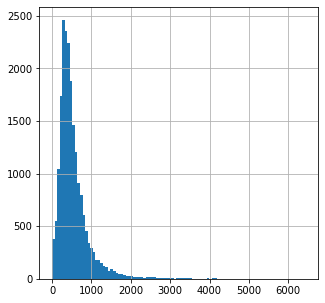

In [13]:
#Look at the distribution of the data in the total_bedrooms colum
cali_df["total_bedrooms"].hist(bins=100, figsize=(5,5))

- We have seen that there are 207 rows that have missing values in the total_bedrooms column. So, we have 207 null values. We can either drop the rows with null values or we can replace the null values with either the mean or median.
- As it appears to me and due to the fact that our dataset is small, 207 rows is too big of a number to drop. 
- It would be interesting to investigate why the 207 values are missing but for the sake of this excercise and given the resources(time)assigned to this project, we will go ahead and replace the missing values with the median value of the total_bedrooms. We use the median because outliers will not affect the median value due to the data distribution in the total_bedrooms is skewed as shown in the graph above.

In [14]:
median = cali_df["total_bedrooms"].median(axis=0)
cali_df["total_bedrooms"].replace(np.nan,median,inplace=True)
cali_df.isnull().sum(axis=0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
total_pools           0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Now that we have a clean dataset with neither duplicates nor missing values we will proceed with visualisations to better understand the data and make some initial hypotheses and conclusions.

## 2. Data Visualisations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a175368d0>,
      dtype=object)

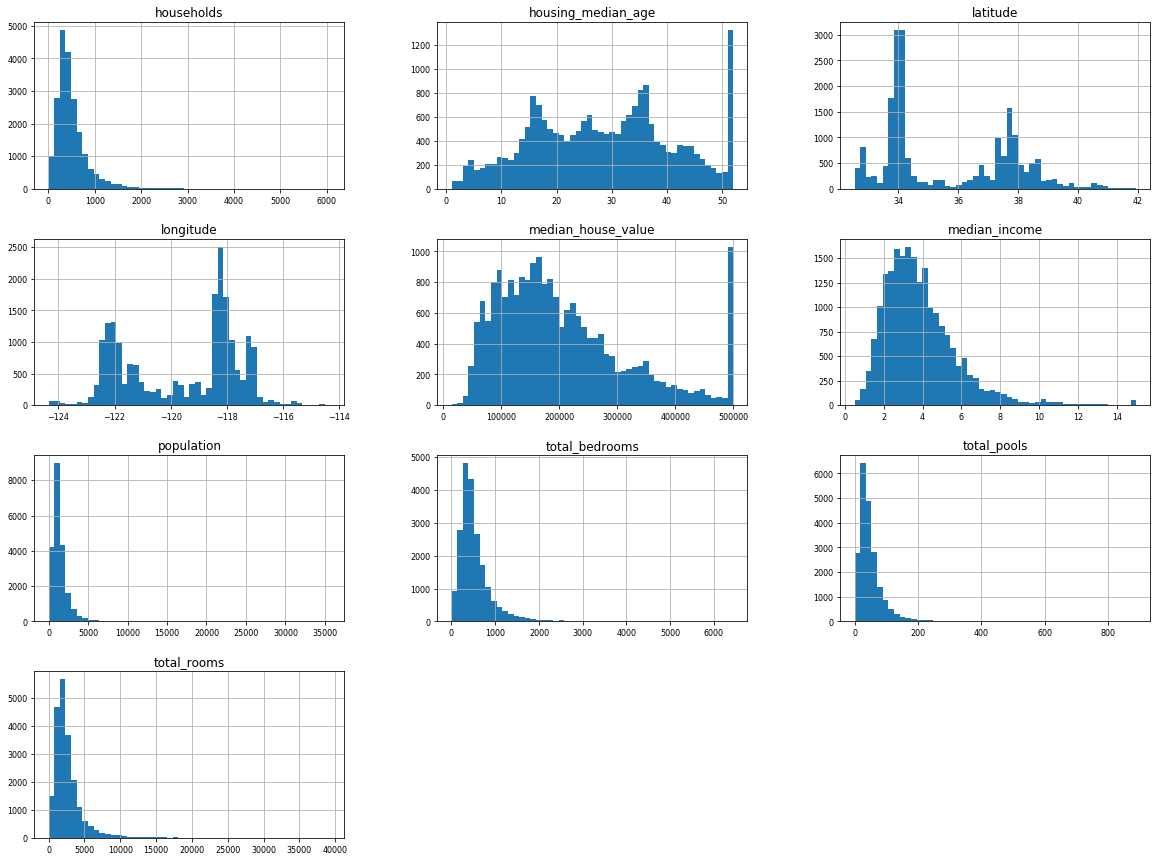

In [15]:
#View histograms to see data distributions for all the features 
cali_df[["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","total_pools","population","households","median_income","median_house_value"]].hist(bins=50, figsize=(20,15), xlabelsize =8, ylabelsize =8)

What we can infer from above histograms is that most of the features are positively skewed. We can also see that that housing_median_age and median_housing_value have peaks at the end.

### Taking a closer look at the price distribution of the target feature

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

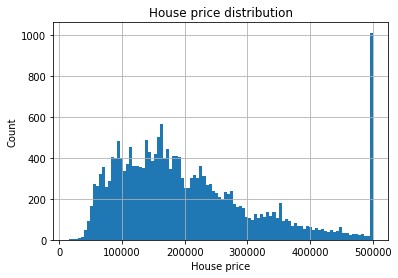

In [16]:
cali_df["median_house_value"].hist(bins=100)
plt.title("House price distribution")
plt.xlabel("House price")
plt.ylabel("Count")
sns.despine

As we can see from the price distribution, most houses cost between 100,000 and 300,000. So for someone considering to buy a house would start with this number in mind. But is the price a powerful determinant for a buyer? It would also be interesting to see the location of the houses in the mentioned price range using GPS coordinates since we have them in our dataset.

### Visualizing the location of the houses based on latitude and longitude.

<p>Since we have  of the GPS cordinates in our dataset, it would be interesting to see how these houses are distributed based on longitude and latitude<p>

/Users/NoellaBatete/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

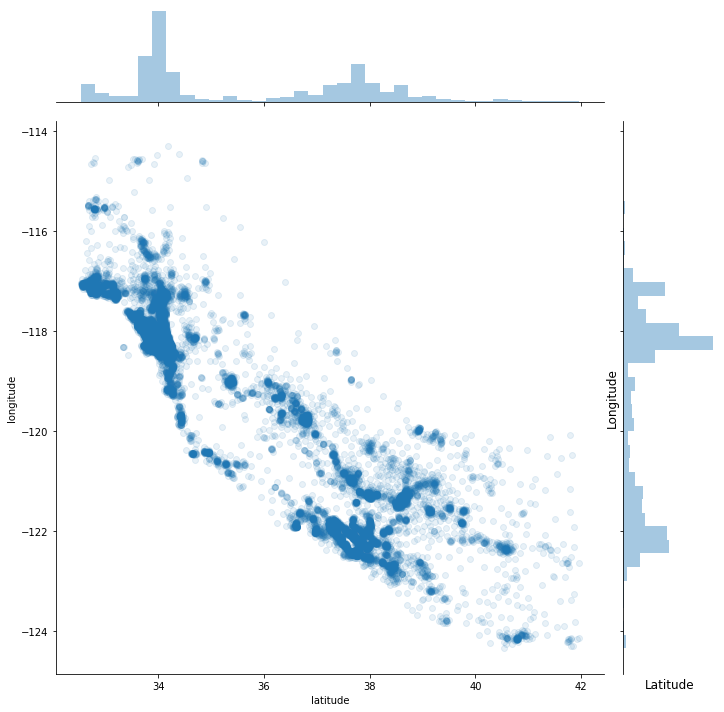

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [17]:
#Using jointplot to see the distributions of the houses 
plt.figure(figsize=(10,10))
sns.jointplot(y=cali_df["longitude"], x=cali_df["latitude"], size=10, alpha=0.1)
plt.ylabel("Longitude", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.show()
sns.despine

<p>Using Jointplot to see the concentration of data and placement of houses and with alpha set to 0.1 we see more densely populated areas shown in more bold blue than the less densely areas</p>

- What can be infered from the graph is that there is high concetration of houses in the longitute between -119 and -121 which could mean that maybe most people are looking to buy houses in this area? And when we look at the Latitude the most concetrated area is between 32 and 35. Overall it could mean that there are more affordable house in this area,or if a buyer is willing to live in a less concetrated area they would aim at looking in latidutes between 40 and 42 and longitudes between -124 and -122. 

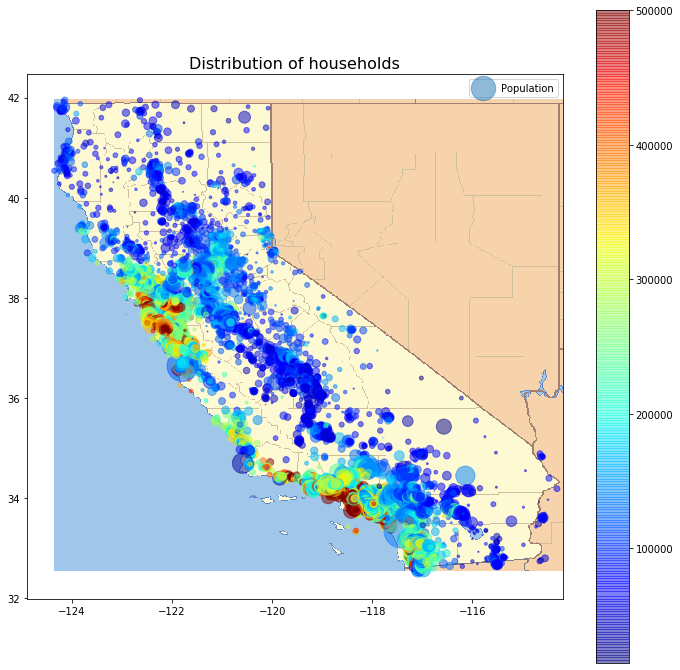

In [18]:
#Use the California map to visualise the distibution of houses
plt.figure(figsize=(12,12))
img=plt.imread("california.png")
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=cali_df["longitude"],y=cali_df["latitude"],alpha=0.5,s=cali_df["population"]/30,
            c=cali_df["median_house_value"],cmap=plt.get_cmap("jet"),zorder=1,label="Population")
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

From above plot we can infer that:

- Housing prices are very related to location and population density.
- Housing prices near ocean are have higher prices except in the northern part of california.

### What major factors are affecting house prices in California?

To make visuals we are going to use Heat Maps. Heat maps are used to provide a colored visual summary of the data and providing us with a matrix or 2 dimensional form.
- The graph will help us see how each feature is correlated to the rest of the features using pearson correlation that is set as default when using the corr() function.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_pools,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.045611,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.059652,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.273051,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.827349,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.880003,0.873535,0.974366,-0.007617,0.049457,0.017966,-0.006158,-0.004322,-0.019667,0.000557
total_pools,0.045611,-0.059652,-0.273051,0.827349,0.880003,1.000000,0.823481,0.904357,0.009986,0.055536,0.039200,-0.032581,-0.007176,-0.011369,-0.001860
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,0.823481,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.904357,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.009986,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,0.055536,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862


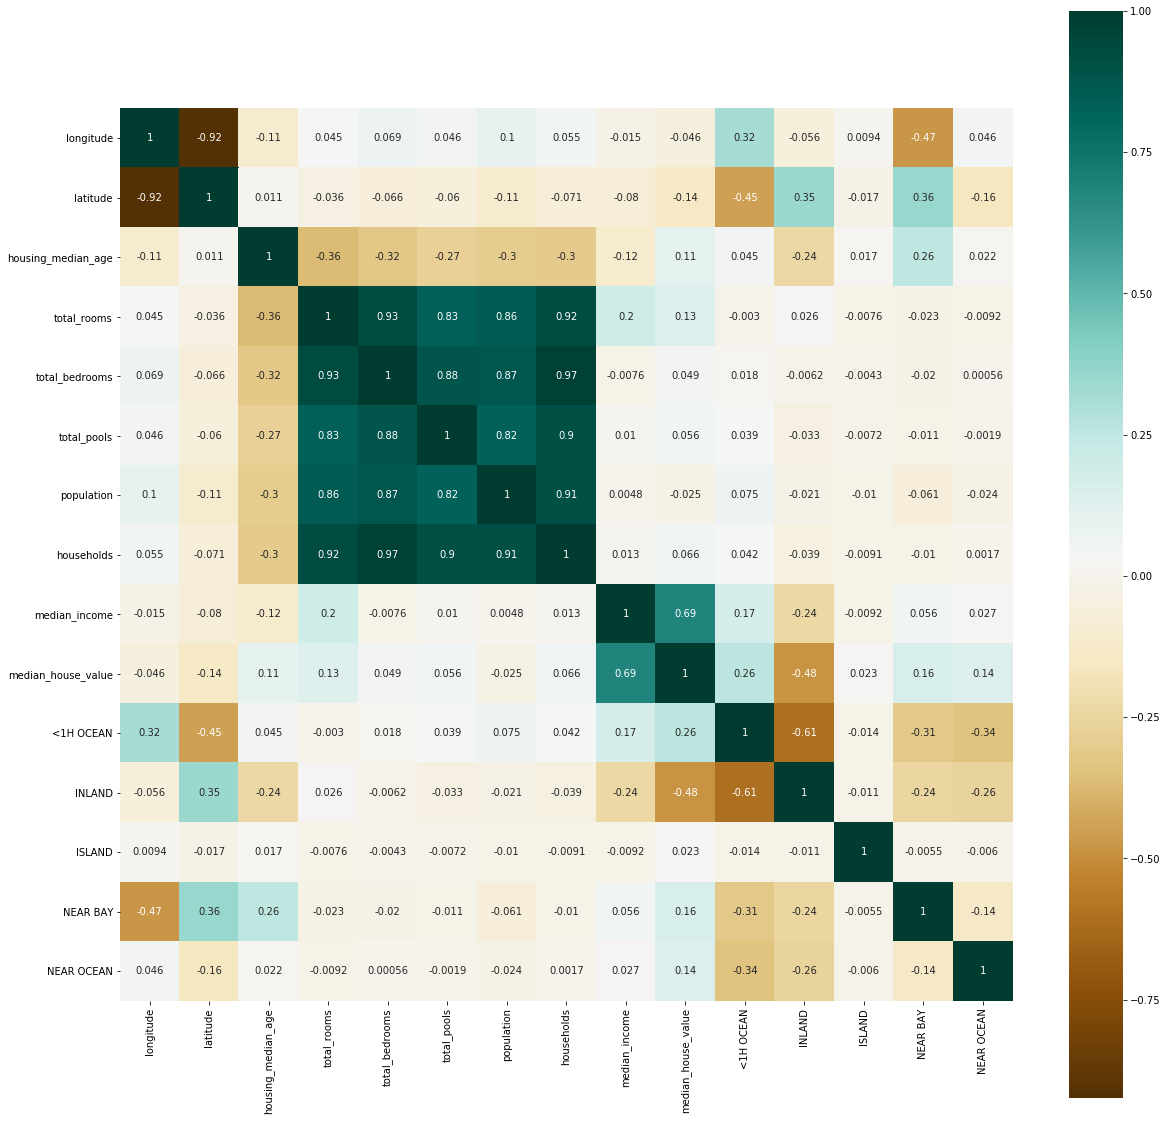

In [19]:
plt.figure(figsize=(20,20))
c=cali_df.corr()
sns.heatmap(c,cmap="BrBG", annot=True,square =True)
c

#### From the matrix we can infer the following ; 
- The medium_house_value has a  relatively positive correlation with median_icome  by looking at the Pearson correlation coefficient which is equal to 0.69 
- There is no significant correlation between medium_house_value and other attributes.
- The attributes where there is no correlation between the response variable and predictor variables it is a good idead to drop those attributes when considering to use Linear regression models which we will use later on.


In [20]:
# For a closer look let us see how our target variable is related to the rest of the features
correlation_Matrix = cali_df.corr()
correlation_Matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_pools           0.055536
total_bedrooms        0.049457
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

After looking at the heat map graph and learning that median_icome has a positive correlation to the target variable we test the hypothesis using p-value. The null hypotheis is (medium_house_value is not correlated to median_icome or the meidan income does not affect the house price). If the value of p turns out to be less than 0.05 we will reject the null hypothesis if otherwise , we will adopt the null hypothesis.


In [21]:
from scipy import stats
pearson_coef,p_value = stats.pearsonr(cali_df['median_income'], cali_df['median_house_value'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6880752079585479  with a P-value of P = 0.0


With the P value = 0.0 and this indicates a strong evidence against the null hypothesis. We reject the null hypothesis and this proves that there is strong correlation between median income and median house value.

### Visualizing median income against house price 

(15.0001, 500001.0)

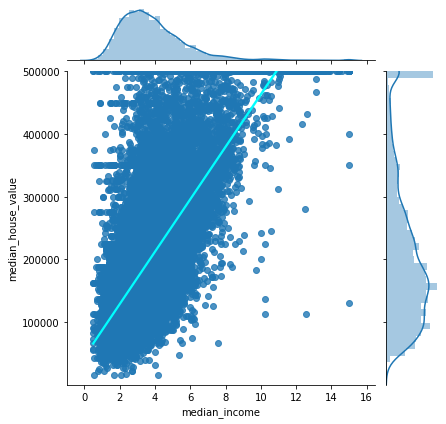

In [22]:
#Ploting medium_house_value against median_icome
sns.jointplot(x="median_income", y="median_house_value", data=cali_df, kind='reg',
                  joint_kws={"line_kws":{"color":"cyan"}})
plt.ylim(max(cali_df["median_income"]),max(cali_df["median_house_value"]))

Joint plots help in visualising the relationship between two features.We already have seen that income is a determinant factor and we see that data point are linear in direction. This means that the the higher the income the more the cost of the housing is. Can we also see irregularities in the data by looking at the points that are deviating from the others which might affect the perfomance of the model going forward. We need to deal with these irregularities. 

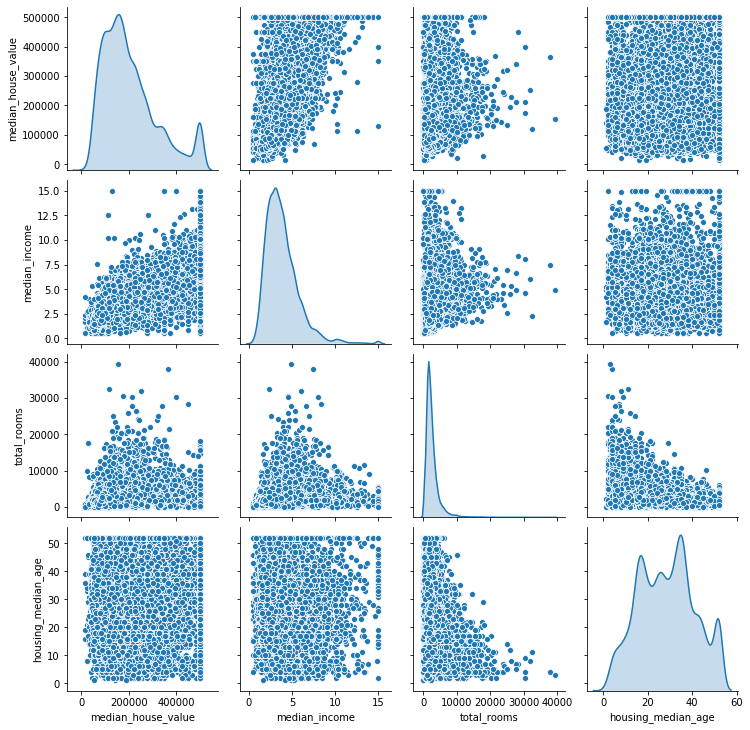

In [23]:
sns.pairplot(cali_df[["median_house_value","median_income","total_rooms","housing_median_age"]], diag_kind="kde")

### Something Else ...

In [24]:
#!conda install -c conda-forge folium=0.5.0 --yes
#import folium 
#print ("Folium has been successsfully installed and imported")

In [25]:
#define the world map centered around Canada with a low zoom level
#californiadMap = folium.Map(location=[36.7783,-119.4179],zoom_start=6)
#display(californiadMap)

## 3. Data Wrangling

### Creating new features 

<ol>
    <p> We are going to create 3 new features, why? because we are predicting house prices and we have prices for the whole block.</p>
    <p>The features are below; </p>
    <li>rooms_per_household</li>
    <li>bedrooms_per_room</li>
    <li>population_per_household</li>
    <p></p>
<ol>

In [26]:
#To begin with we look use a copy of  the dataset to first see if the creation of new features makes a difference
cali_df_copy= df.copy()

In [27]:
cali_df_copy["rooms_per_household"]=cali_df_copy["total_rooms"]/cali_df_copy["households"]
cali_df_copy['bedrooms_per_room']=cali_df_copy["total_bedrooms"]/cali_df_copy["total_rooms"]
cali_df_copy["population_per_household"]=cali_df_copy["population"]/cali_df_copy["households"]

In [28]:
cali_df_copy.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_pools,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,11,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,150,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842


In [29]:
#Check how the new features are correlated to median_house_value
corr_matrix=cali_df_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_pools                 0.055536
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

We then can infer that rooms_per_household and bedrooms_per_room have better correlation with median_house_value compared to total_rooms and total_bedrooms. So we continue the analysis with the new dataframe copy created above.

### Visualising outliers and dealing with them

We had to remove outliers to make sure that when it comes to modelling the models will not overfit or underfit.

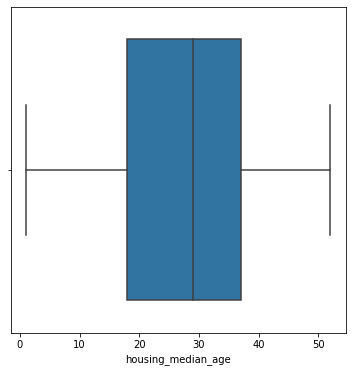

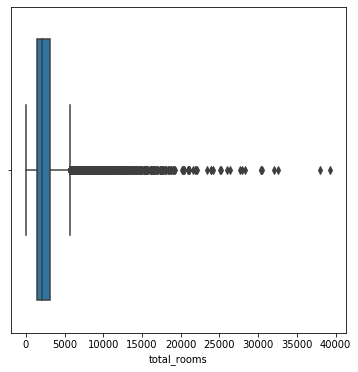

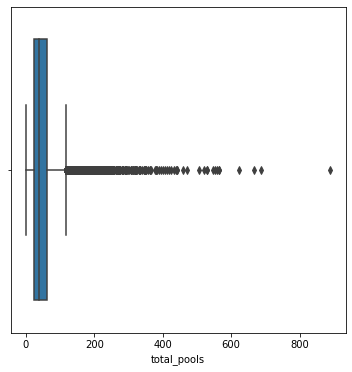

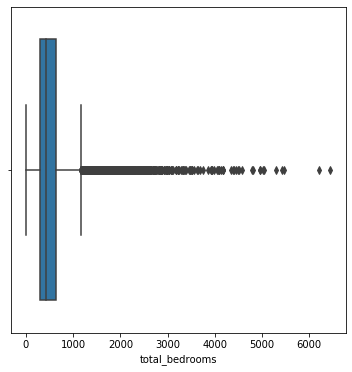

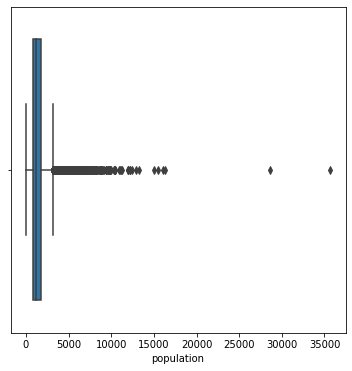

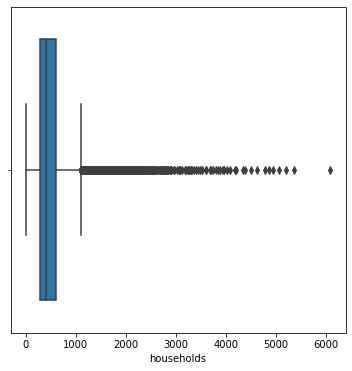

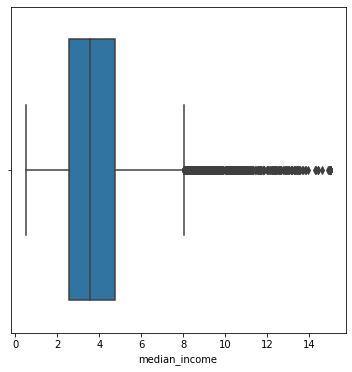

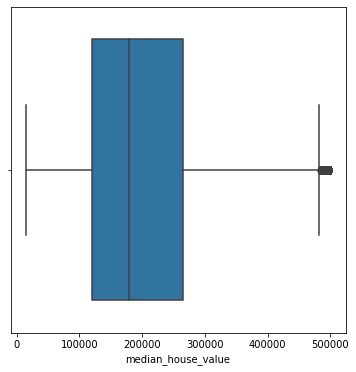

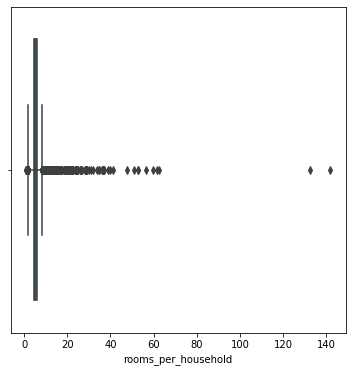

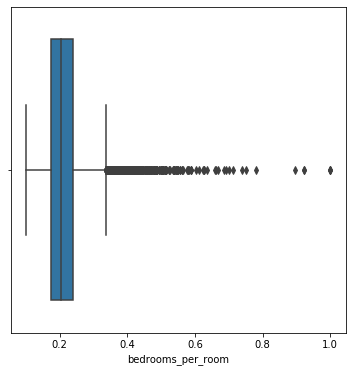

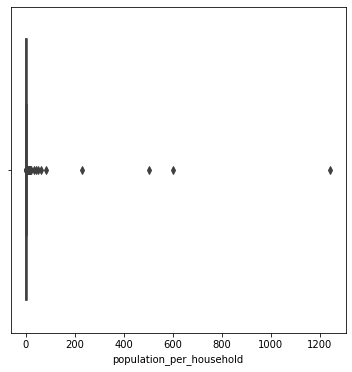

In [30]:
#using boxplots to visualise the data 
num_features=["housing_median_age", "total_rooms","total_pools", 
       "total_bedrooms", "population", "households", "median_income",
       "median_house_value", "rooms_per_household",
       "bedrooms_per_room", "population_per_household"]

for j in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(6,6)
    sns.boxplot(x=j,data=cali_df_copy,ax=ax)

From the boxplots above and also as we had seen before, we notice extreme values or outliers in the “total_rooms”,”total_bedrooms”,”total_pools”,"population","households", "median_house_value" ,"rooms_per_household"
"bedrooms_per_room" and "population_per_household". 
Dealing with outliers is a key step before modeling however when one should proceed with caution when considering to remove observations from the data. In most cases, there is a valid reason for these observations to be outliers and that is what the researcher should be studying to find out why an observation was an outlier in the first place.
In this analysis log function has shown to scale the data which in turn deals with outliers. 
In the graph below shows how a log function removes outliers on our response variable "median_house_value". 
- Note: <i>We later on scale all out predictor variables before modeling</i>

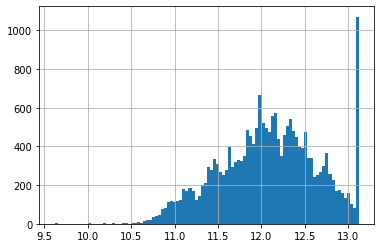

In [31]:
#"median_house_value" scaled 
np.log(cali_df_copy["median_house_value"]).hist(bins=100)

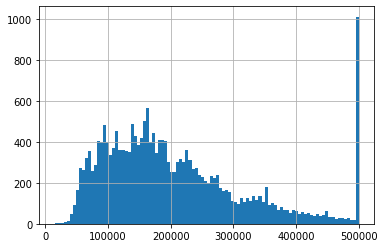

In [32]:
#"median_house_value" not scaled 
cali_df_copy["median_house_value"].hist(bins=100)

### Feature selection

In [33]:
cali_df_copy.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'total_pools', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

<b><p>We will use features :</p></b>
"housing_median_age","total_rooms","total_pools", "total_bedrooms", "population", "households", "median_income", "rooms_per_household","bedrooms_per_room", "population_per_household","INLAND","ISLAND","NEAR BAY","NEAR OCEAN", "rooms_per_household","bedrooms_per_room", "population_per_household". 

- We are leaving out the longitude and latitude features and to be able to use  there would be need of using spatial models which at this point we have not decided to go with. 

In [34]:
#We drop our target variable
#We also drop the 'ocean_proximity' because we created dummies to replace it 
Feature = cali_df_copy.drop(['median_house_value','ocean_proximity'], axis=1)
Feature.head()
Feature.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'total_pools', 'population', 'households',
       'median_income', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [35]:
Feature.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
total_pools                   int64
population                  float64
households                  float64
median_income               float64
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

Lets define Feature sets, <b>X</b>:

In [36]:
X = Feature
X[0:5]
#type(X)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_pools,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,11,322.0,126.0,8.3252,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,150,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,17,496.0,177.0,7.2574,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,23,558.0,219.0,5.6431,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,32,565.0,259.0,3.8462,6.281853,0.172096,2.181467


In [37]:
Feature.isnull().sum(axis=0)

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
total_pools                   0
population                    0
households                    0
median_income                 0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [38]:
med_total_bedrooms_1 = Feature["total_bedrooms"].median(axis=0)
print("The median of total number of bedrooms is:", med_total_bedrooms_1)

The median of total number of bedrooms is: 435.0


In [39]:
med_total_bedrooms_2 = Feature["bedrooms_per_room"].median(axis=0)
print("The median of total number of bedrooms is:", med_total_bedrooms_2)

The median of total number of bedrooms is: 0.20316243411595591


In [40]:
#replace the missing values in the total_bedrooms column with the mean value
Feature["total_bedrooms"].replace(np.nan, med_total_bedrooms_1, inplace=True)
Feature["bedrooms_per_room"].replace(np.nan, med_total_bedrooms_2, inplace=True)
Feature.isnull().sum(axis=0)

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
total_pools                 0
population                  0
households                  0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

<b> Our response variable </b>

In [41]:
y = cali_df_copy["median_house_value"].values
y[0:5]

array([452600., 358500., 352100., 341300., 342200.])

### Data Standardization

- Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation. This will allow us to make comparisons.
- At this point we will be converting data from the initial format to a format that may be better for analysis

In [42]:
#importing the preprocessing library 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [43]:
#Data Standardization give data zero mean and unit variance (technically should be done after train test split )
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
        -0.90190161, -0.9744286 , -0.97703285,  2.34476576,  0.62855945,
        -1.14993031, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891,  2.0458901 ,  1.35714343,
         2.35787529,  0.86143887,  1.66996103,  2.33223796,  0.32704136,
        -0.99038135, -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, -0.53574589, -0.82702426,
        -0.76119181, -0.82077735, -0.84363692,  1.7826994 ,  1.15562047,
        -1.44586501, -0.02584253],
       [-1.33781784,  1.03850269,  1.85618152, -0.62421459, -0.71972345,
        -0.62048202, -0.76602806, -0.73378144,  0.93296751,  0.15696608,
        -0.49362714, -0.0503293 ],
       [-1.33781784,  1.03850269,  1.85618152, -0.46240395, -0.61242263,
        -0.40941733, -0.75984669, -0.62915718, -0.012881  ,  0.3447108 ,
        -0.707889  , -0.08561576]])

Normalization is the process of transforming values of several feature into a similar range. Typical normalizations include scaling feature so that the average is 0 and variance is 1, or scaling variable so the variable values range from 0 to 1

### Splitting data into training and testing sets (80% train and 20% test)

In [44]:
#Importing the train_test_split for splitting the data
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [45]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=seed)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 12) and size 198144
X_test shape (4128, 12) and size 49536
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


## 4. Model Development

Now that we are familiar with the data representations and we can tell our own story, we will go ahead and develop predictive models to predict house prices in California.

<ol>
<p>Now, it is turn to use the training set to build an accurate predictive model. Then use the test set to report the accuracy of the model You should use the following algorithm:</p>
    
<b><li> Linear Regression </li></b>
<b><li> Random Forest Regression </li></b>

<p>One can always go back and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model</p>
- We can use either scikit-learn, Scipy or Numpy libraries for developing predicitve models.
<ol>

Regression works on the line equation , y=mx+c , trend line is set through the data points to predict the outcome.

### 1. Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<b>Linear Regression Model Evaluation </b>

In [47]:
# let's try the full pipeline on a few training instances
from sklearn.metrics import r2_score
r2_score(lin_reg.predict(X_test),y_test)

0.47192553920828695

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

housing_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean Square Error:",lin_rmse)
lin_mae = mean_absolute_error(y_test, housing_predictions)
print("Mean Absolute Error:",lin_mae)

Root Mean Square Error: 67087.58002607278
Mean Absolute Error: 49103.48607222202


### 2. Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rfReg = RandomForestRegressor(90)
rfReg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
rfReg_y_pred = rfReg.predict(X_test)
rfReg_y_pred

array([245972.23333333, 113805.55555556, 133817.77777778, ...,
       180186.71111111,  91811.11111111, 129684.44444444])

In [52]:
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:5])
print(y_test[0:5])

4128
4128
[245972.23333333 113805.55555556 133817.77777778 119995.55555556
 242073.34444444]
[245300. 104200. 146200. 154200. 324200.]


<b>Random Forest Regression Model Evaluation </b>

In [53]:
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))

49889.058041280645


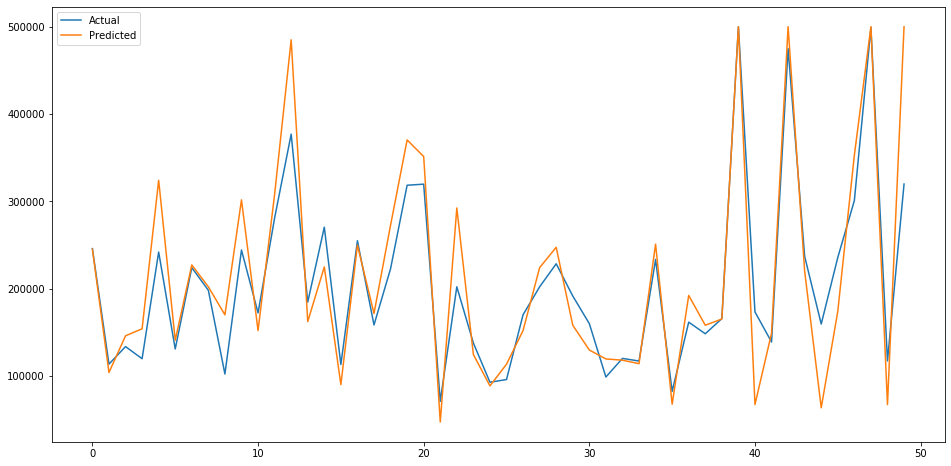

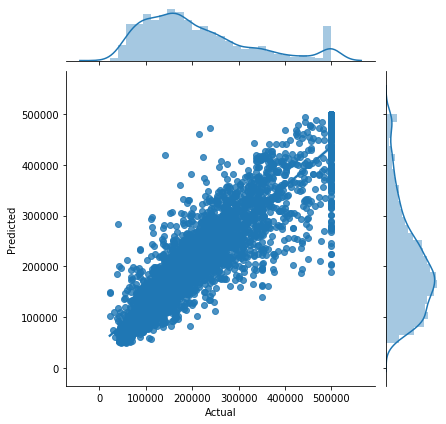

In [54]:
test = pd.DataFrame({'Predicted':rfReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

In [55]:
#Fine tunng parameters to see if there will be improvement in the model accuracy
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [56]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51179.08212489189 {'max_features': 5, 'n_estimators': 195}
54446.93464455909 {'max_features': 2, 'n_estimators': 157}
54499.51262246958 {'max_features': 2, 'n_estimators': 118}
61947.50047999281 {'max_features': 1, 'n_estimators': 32}
54271.690125100766 {'max_features': 2, 'n_estimators': 181}
52209.359639080314 {'max_features': 3, 'n_estimators': 165}
52464.17815050337 {'max_features': 3, 'n_estimators': 39}
51522.8789863958 {'max_features': 4, 'n_estimators': 124}
51651.565193639675 {'max_features': 7, 'n_estimators': 61}
51354.14063197542 {'max_features': 7, 'n_estimators': 170}


## 5. Conclusions

Throughout this analysis we have worked on predicting prices of houses in California. We explored the data and found out that there was a positive linear relationship between house prices and income of poeple in the area. 
To make predictions we have used two machine learning models one being linear regression model and another one Random Forest Regression. It was important for us to use a simple linear model and an ensemble model and compare the results. Also, taking into account that Linear models are prone to overfitting in that they tend to do well on the training data and not so well on new observations. Random Forest regression models on the other hand tend to improve predictive results and control over-fitting.

Before modelling, and, after cleaning & transforming the data, we  split the dataset into Training and testing sets. using the train_test_split library from sklearn. During the exploration of the data and upon finalization of the feature selection, features with data type object were converted to numerical values and feature standarization was performed to implicitly weigh all features equally in their representation. Also the missing values in one of the numerical variables was replaced by the median value.

Next in order to select a prediction method, regression models were explored and compared. The performance measure used to compare various prediction models was RMSE (Root Mean Square Error). Below are the details of the models implemented and their performance scores:

- Linear Regression: RMSE -  67087.58002607278
- Random Forest Regressor: RMSE -  49889.058041280645

With Random Forest Regression showing lower RSME one could choose to deploy it if and only if it meets the expectation of the business owner. And again before deploying the model a number of questions should be taken into account. Questions could be like ; 

- Is the data used representative enough?
- Are the features present in the data sufficient enough to describe a home or estimate its price? Could factors like quality of apppliances in the home, square feet of the plot area, or not etc should factor in? 
- Would the designed model make consistent predictions going forward?

Further work could focus on building more machine learning models to see which ones reduces the errors or even fine tune the Hyperparameters for Random Forest Regressor to see what features are most relevant going forward. 
